In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import ttest_ind, levene, shapiro
from scipy.stats import norm, t, expon, lognorm, kstest, anderson
import statsmodels.api as sm
from scipy.stats import ks_2samp
from scipy.stats import mannwhitneyu
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from google.colab import files

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/BTC_GreedAndFear_S&P.csv')

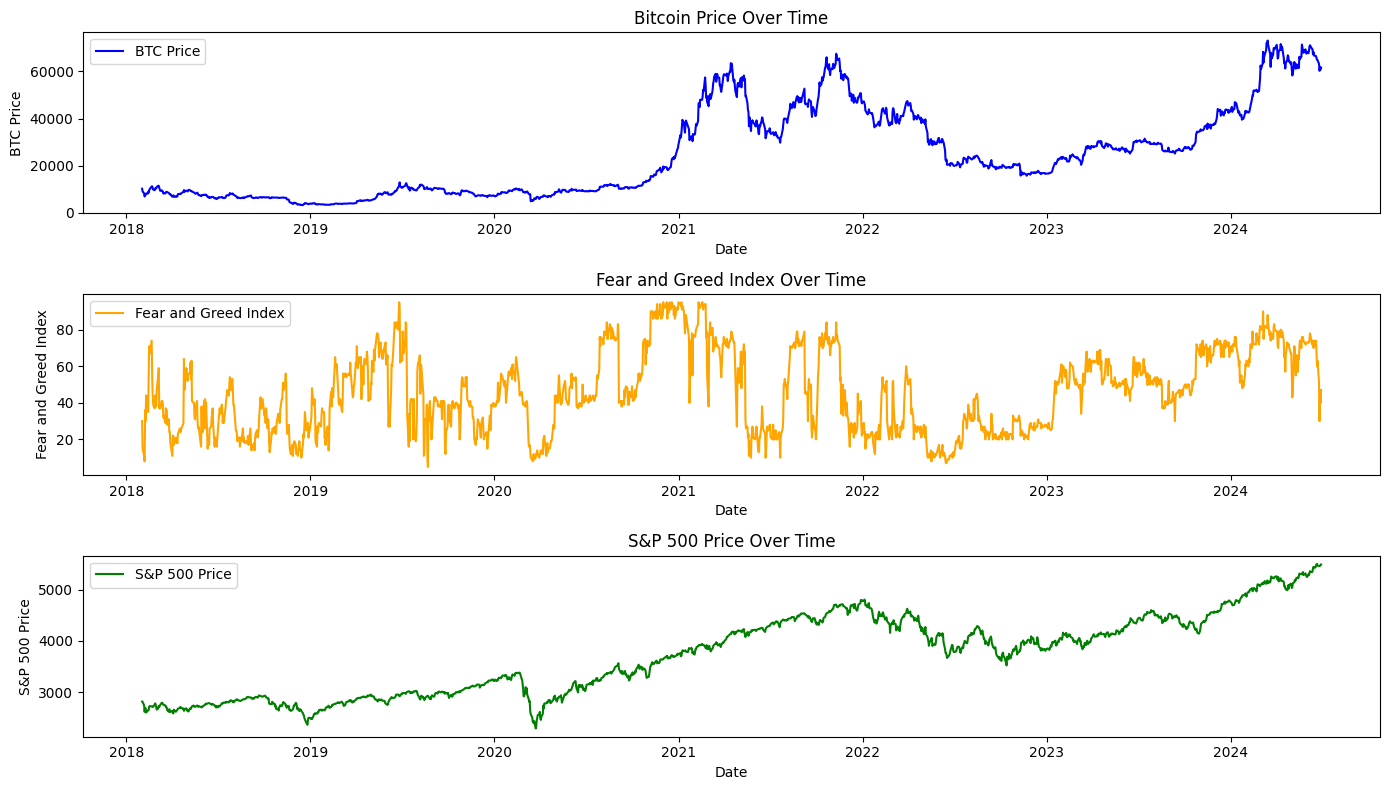

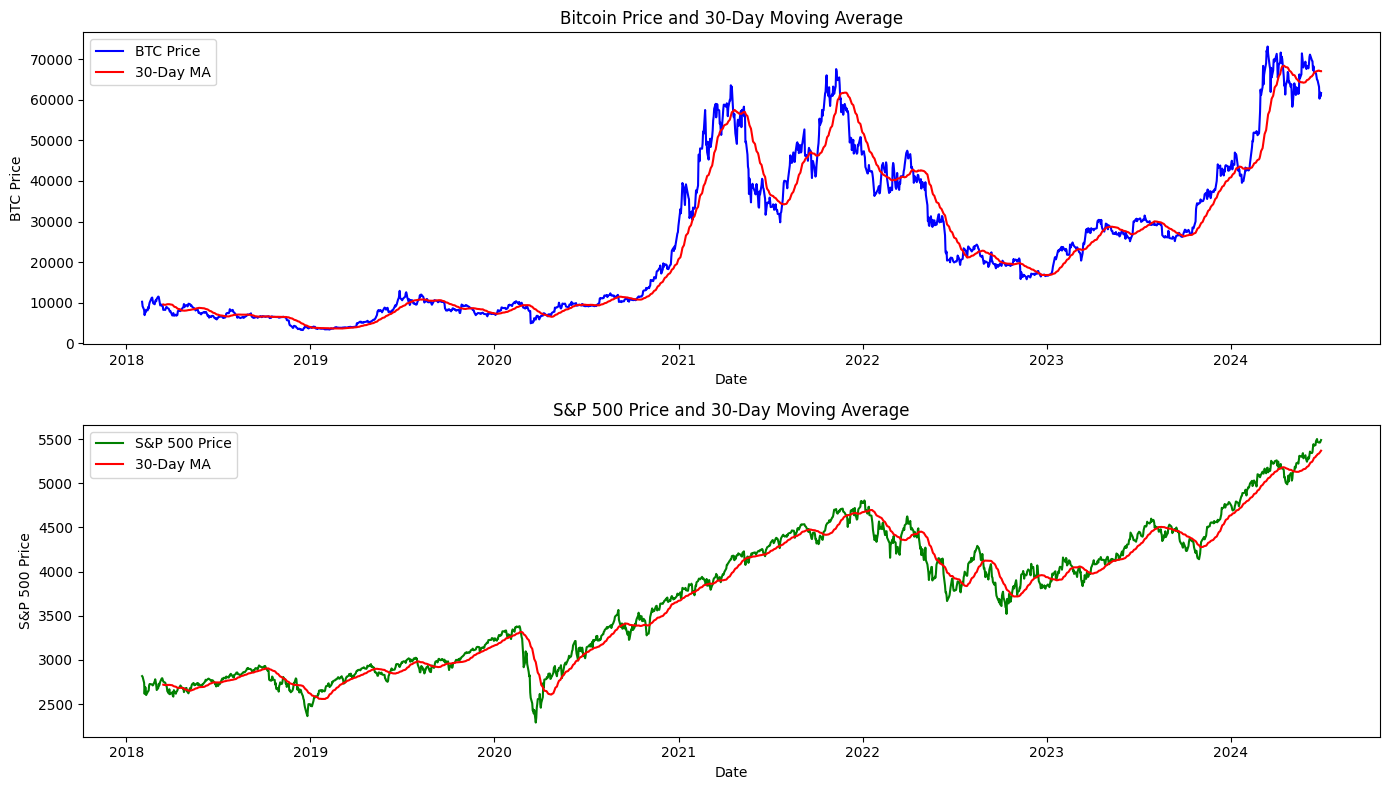

(                                Date     BTC_PRICE  fear_and_greed_index  \
 count                           1611   1611.000000           1611.000000   
 mean   2021-04-15 14:20:46.927374336  24798.308709             46.055866   
 min              2018-02-01 00:00:00   3255.370000              5.000000   
 25%              2019-09-10 12:00:00   8652.490000             27.000000   
 50%              2021-04-16 00:00:00  20050.280000             44.000000   
 75%              2022-11-17 12:00:00  38370.490000             63.500000   
 max              2024-06-28 00:00:00  73118.090000             95.000000   
 std                              NaN  18690.298836             21.738151   
 
        S&P500_PRICE  
 count   1611.000000  
 mean    3716.338632  
 min     2290.709961  
 25%     2920.474976  
 50%     3834.689941  
 75%     4357.679932  
 max     5499.990234  
 std      778.169710  ,
                           Date  BTC_PRICE  fear_and_greed_index  S&P500_PRICE
 Date             

In [ ]:
# Descriptive statistics
data['Date'] = pd.to_datetime(data['Date'])
descriptive_stats = data.describe()

# Correlation matrix
correlation_matrix = data.corr()

# Plotting the trends of Bitcoin price, fear and greed index, and S&P 500 price over time
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(data['Date'], data['BTC_PRICE'], label='BTC Price', color='blue')
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(data['Date'], data['fear_and_greed_index'], label='Fear and Greed Index', color='orange')
plt.title('Fear and Greed Index Over Time')
plt.xlabel('Date')
plt.ylabel('Fear and Greed Index')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(data['Date'], data['S&P500_PRICE'], label='S&P 500 Price', color='green')
plt.title('S&P 500 Price Over Time')
plt.xlabel('Date')
plt.ylabel('S&P 500 Price')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate and plot the moving averages
data['BTC_MA_30'] = data['BTC_PRICE'].rolling(window=30).mean()
data['SP500_MA_30'] = data['S&P500_PRICE'].rolling(window=30).mean()

plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(data['Date'], data['BTC_PRICE'], label='BTC Price', color='blue')
plt.plot(data['Date'], data['BTC_MA_30'], label='30-Day MA', color='red')
plt.title('Bitcoin Price and 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(data['Date'], data['S&P500_PRICE'], label='S&P 500 Price', color='green')
plt.plot(data['Date'], data['SP500_MA_30'], label='30-Day MA', color='red')
plt.title('S&P 500 Price and 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('S&P 500 Price')
plt.legend()

plt.tight_layout()
plt.show()

descriptive_stats, correlation_matrix

In [ ]:
plt.savefig('/content/btc_index_historical_retutrns_plot.png')

files.download('/content/btc_index_historical_retutrns_plot.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
data['BTC_DAILY_RETURN'] = data['BTC_PRICE'].pct_change()

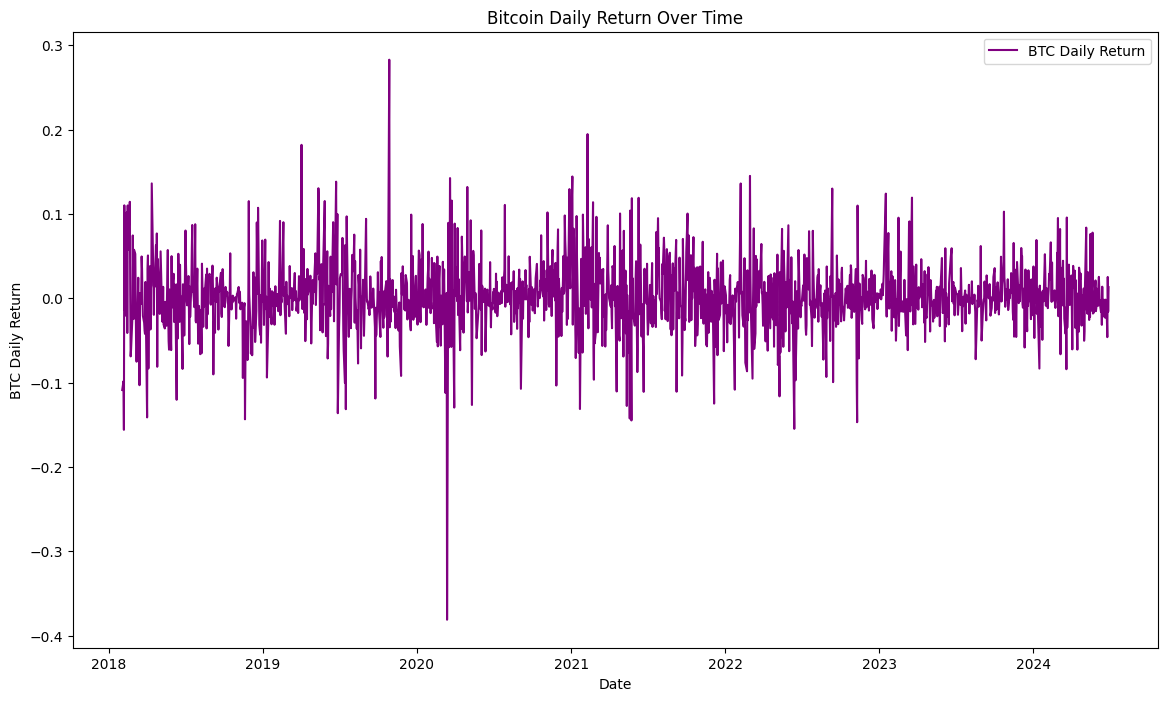

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(data['Date'], data['BTC_DAILY_RETURN'], label='BTC Daily Return', color='purple')
plt.title('Bitcoin Daily Return Over Time')
plt.xlabel('Date')
plt.ylabel('BTC Daily Return')
plt.legend()

In [ ]:
plt.savefig('/content/btc_daily_historical_retutrns_plot.png')

files.download('/content/btc_daily_historical_retutrns_plot.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
descriptive_stats = data['BTC_DAILY_RETURN'].describe()

descriptive_stats

count    1610.000000
mean        0.002041
std         0.042745
min        -0.381176
25%        -0.017846
50%        -0.000065
75%         0.022258
max         0.282959
Name: BTC_DAILY_RETURN, dtype: float64

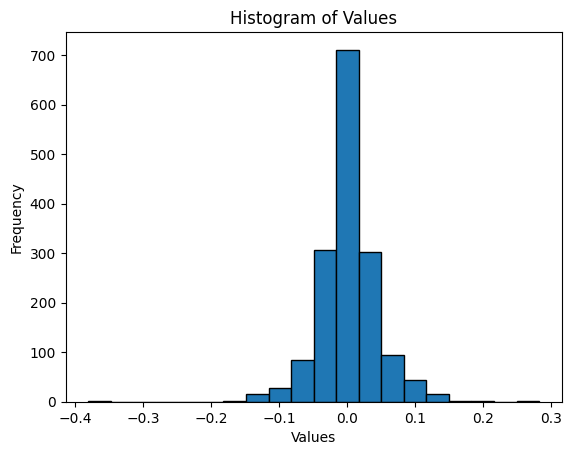

In [ ]:
plt.hist(data['BTC_DAILY_RETURN'], bins=20, edgecolor='black')

# Add titles and labels
plt.title('Histogram of Values')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [ ]:
plt.savefig('/content/btc_index_historical_retutrns_histogram.png')

files.download('/content/btc_index_historical_retutrns_histogram.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

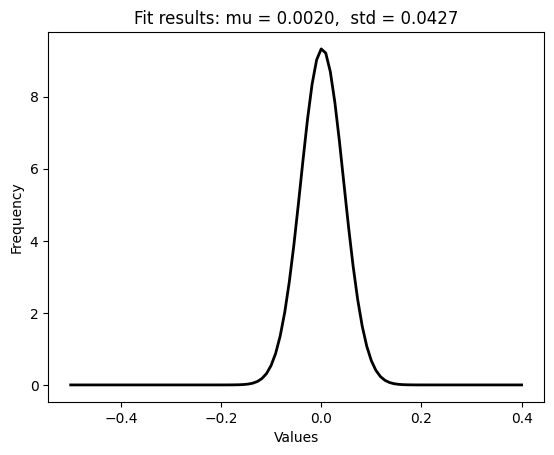

In [ ]:
mu, std = norm.fit(data['BTC_DAILY_RETURN'].dropna())

# Plot the Gaussian fit
x = np.linspace(-0.5, 0.4, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Add titles and labels
title = f"Fit results: mu = {mu:.4f},  std = {std:.4f}"
plt.title(title)
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [ ]:
data['LAGGED_BTC_DAILY_RETURN'] = data['BTC_DAILY_RETURN'].shift(1)

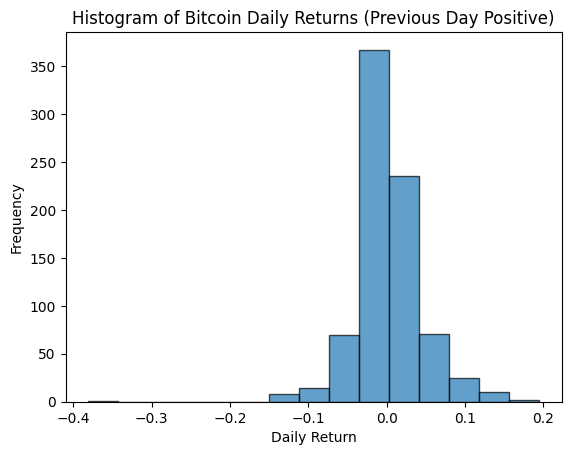

In [ ]:
filtered_data = data[data['LAGGED_BTC_DAILY_RETURN'] > 0]

# Create a histogram of the daily returns where the previous day was positive
plt.hist(filtered_data['BTC_DAILY_RETURN'].dropna(), bins=15, edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Histogram of Bitcoin Daily Returns (Previous Day Positive)')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [ ]:
plt.savefig('/content/btc_index_historical_retutrns_histogram_p1.png')

files.download('/content/btc_index_historical_retutrns_histogram_p1.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

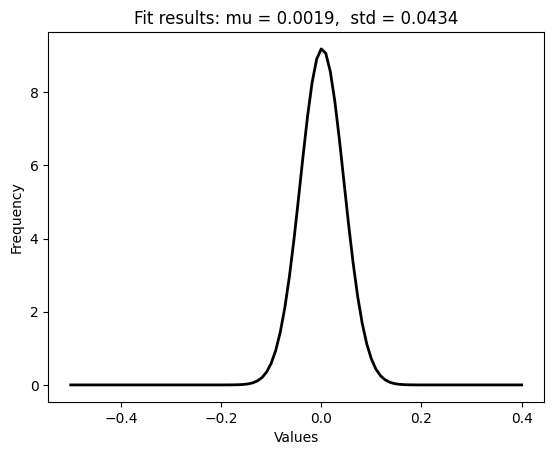

In [ ]:
mu, std = norm.fit(filtered_data['BTC_DAILY_RETURN'].dropna())

# Plot the Gaussian fit
x = np.linspace(-0.5, 0.4, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Add titles and labels
title = f"Fit results: mu = {mu:.4f},  std = {std:.4f}"
plt.title(title)
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

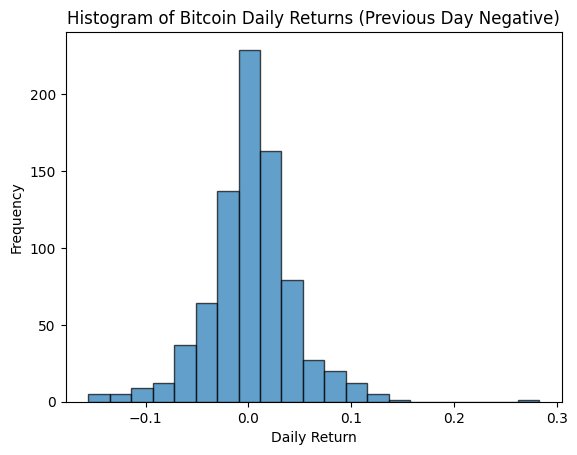

In [ ]:
filtered_data = data[data['LAGGED_BTC_DAILY_RETURN'] < 0]

# Create a histogram of the daily returns where the previous day was positive
plt.hist(filtered_data['BTC_DAILY_RETURN'].dropna(), bins=21, edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Histogram of Bitcoin Daily Returns (Previous Day Negative)')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [ ]:
plt.savefig('/content/btc_index_historical_retutrns_histogram_n1.png')

files.download('/content/btc_index_historical_retutrns_histogram_n1.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

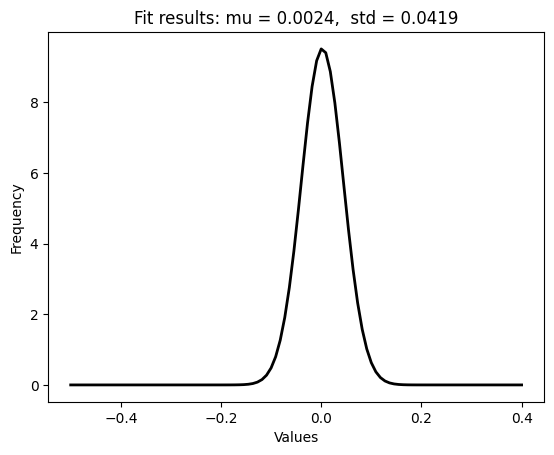

In [ ]:
mu, std = norm.fit(filtered_data['BTC_DAILY_RETURN'].dropna())

# Plot the Gaussian fit
x = np.linspace(-0.5, 0.4, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Add titles and labels
title = f"Fit results: mu = {mu:.4f},  std = {std:.4f}"
plt.title(title)
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [ ]:
data['LAGGED_BTC_DAILY_RETURN_2'] = data['BTC_DAILY_RETURN'].shift(2)

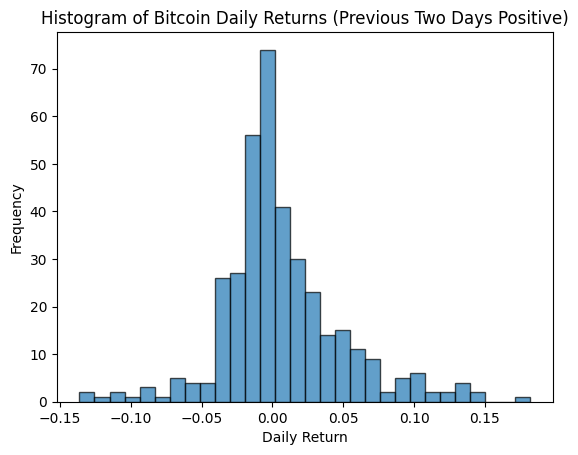

In [ ]:
# Filter the DataFrame to include only rows where the previous two days' returns were positive
filtered_data = data[
    (data['LAGGED_BTC_DAILY_RETURN'] > 0) &
    (data['LAGGED_BTC_DAILY_RETURN_2'] > 0)
]

# Create a histogram of the daily returns where the previous two days were positive
plt.hist(filtered_data['BTC_DAILY_RETURN'].dropna(), bins=30, edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Histogram of Bitcoin Daily Returns (Previous Two Days Positive)')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [ ]:
plt.savefig('/content/btc_index_historical_retutrns_histogram_p2.png')

files.download('/content/btc_index_historical_retutrns_histogram_p2.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

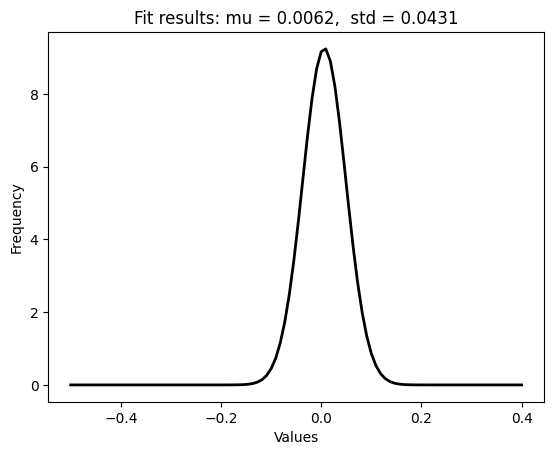

In [ ]:
mu, std = norm.fit(filtered_data['BTC_DAILY_RETURN'].dropna())

# Plot the Gaussian fit
x = np.linspace(-0.5, 0.4, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Add titles and labels
title = f"Fit results: mu = {mu:.4f},  std = {std:.4f}"
plt.title(title)
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

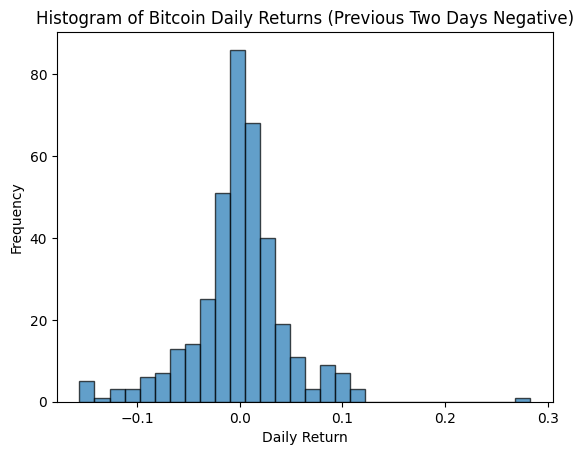

In [ ]:
# Filter the DataFrame to include only rows where the previous two days' returns were positive
filtered_data = data[
    (data['LAGGED_BTC_DAILY_RETURN'] < 0) &
    (data['LAGGED_BTC_DAILY_RETURN_2'] < 0)
]

# Create a histogram of the daily returns where the previous two days were positive
plt.hist(filtered_data['BTC_DAILY_RETURN'].dropna(), bins=30, edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Histogram of Bitcoin Daily Returns (Previous Two Days Negative)')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [ ]:
plt.savefig('/content/btc_index_historical_retutrns_histogram_n2.png')

files.download('/content/btc_index_historical_retutrns_histogram_n2.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

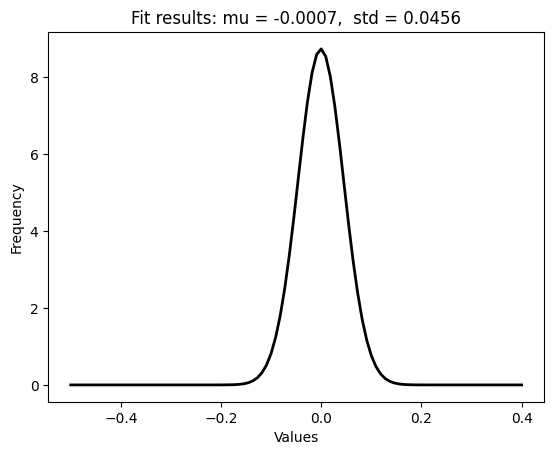

In [ ]:
mu, std = norm.fit(filtered_data['BTC_DAILY_RETURN'].dropna())

# Plot the Gaussian fit
x = np.linspace(-0.5, 0.4, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Add titles and labels
title = f"Fit results: mu = {mu:.4f},  std = {std:.4f}"
plt.title(title)
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [ ]:
filtered_data_positive = data[
    (data['LAGGED_BTC_DAILY_RETURN'] > 0) &
    (data['LAGGED_BTC_DAILY_RETURN_2'] > 0)
].dropna()

filtered_data_negative = data[
    (data['LAGGED_BTC_DAILY_RETURN'] < 0) &
    (data['LAGGED_BTC_DAILY_RETURN_2'] < 0)
].dropna()


# T-Test: Compare the means of the two groups
t_stat, t_p_value = ttest_ind(filtered_data_positive['BTC_DAILY_RETURN'], filtered_data_negative['BTC_DAILY_RETURN'], equal_var=False)
print(f"T-Test: t-statistic = {t_stat}, p-value = {t_p_value}")

# Levene's Test: Compare the variances of the two groups
levene_stat, levene_p_value = levene(filtered_data_positive['BTC_DAILY_RETURN'], filtered_data_negative['BTC_DAILY_RETURN'])
print(f"Levene's Test: statistic = {levene_stat}, p-value = {levene_p_value}")

# Shapiro-Wilk Test: Test for normality of the filtered returns
shapiro_stat, shapiro_p_value = shapiro(filtered_data_positive['BTC_DAILY_RETURN'])
print(f"Shapiro-Wilk Test for Two Day Positive Returns: statistic = {shapiro_stat}, p-value = {shapiro_p_value}")

shapiro_stat, shapiro_p_value = shapiro(filtered_data_negative['BTC_DAILY_RETURN'])
print(f"Shapiro-Wilk Test for Two Day Negative Returns: statistic = {shapiro_stat}, p-value = {shapiro_p_value}")

T-Test: t-statistic = 2.0670307075249994, p-value = 0.03908184238149434
Levene's Test: statistic = 0.007267528331852753, p-value = 0.9320860474349688
Shapiro-Wilk Test for Two Day Positive Returns: statistic = 0.9364228544159832, p-value = 1.9516058686439276e-11
Shapiro-Wilk Test for Two Day Negative Returns: statistic = 0.9222653917554284, p-value = 6.990877633891094e-13


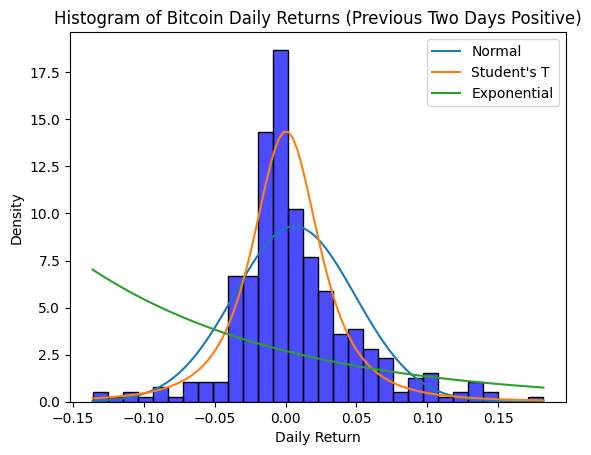

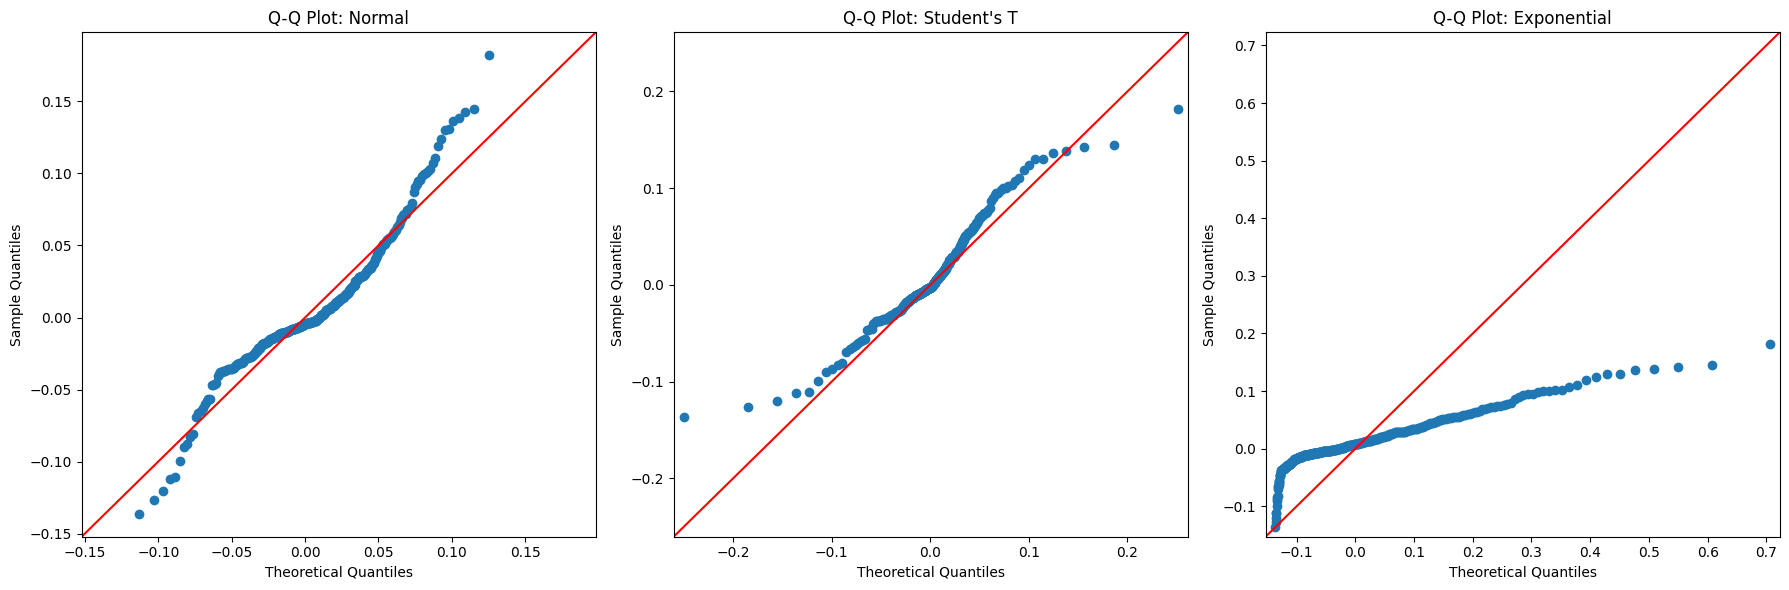

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, t, expon, kstest, anderson
import statsmodels.api as sm

# Assuming 'BTC_DAILY_RETURN' is the column name
filtered_data = filtered_data_positive['BTC_DAILY_RETURN']

# Plot histogram of the filtered daily returns
sns.histplot(filtered_data, bins=30, kde=False, color='blue', edgecolor='black', alpha=0.7, stat="density")

# Fit different distributions to the data
distributions = {
    'Normal': norm,
    'Student\'s T': t,
    'Exponential': expon
}

x = np.linspace(filtered_data.min(), filtered_data.max(), 100)

for name, distribution in distributions.items():
    params = distribution.fit(filtered_data)
    p = distribution.pdf(x, *params)
    plt.plot(x, p, label=f'{name}')

plt.title('Histogram of Bitcoin Daily Returns (Previous Two Days Positive)')
plt.xlabel('Daily Return')
plt.ylabel('Density')
plt.legend()
plt.show()

# Q-Q Plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for (name, distribution), ax in zip(distributions.items(), axes.flatten()):
    params = distribution.fit(filtered_data)
    sm.qqplot(filtered_data, distribution(*params), line='45', ax=ax)
    ax.set_title(f'Q-Q Plot: {name}')

plt.tight_layout()
plt.show()

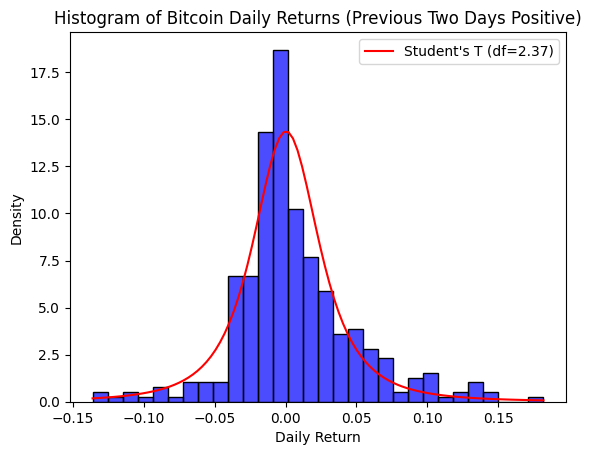

Kolmogorov-Smirnov Test: KS Statistic = 0.05986456308735927, p-value = 0.13734323543266325


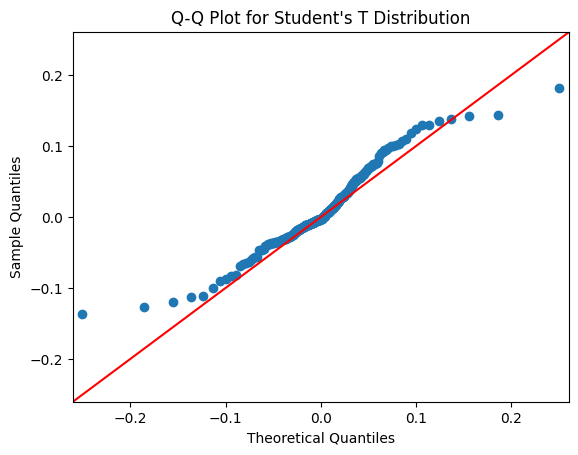

In [ ]:
params = t.fit(filtered_data)
df = params[0]  # degrees of freedom
loc = params[1]  # location parameter
scale = params[2]  # scale parameter

# Plot histogram of the filtered daily returns
sns.histplot(filtered_data, bins=30, kde=False, color='blue', edgecolor='black', alpha=0.7, stat="density")

# Plot the fitted T-distribution
x = np.linspace(filtered_data.min(), filtered_data.max(), 100)
p = t.pdf(x, df, loc, scale)
plt.plot(x, p, label=f'Student\'s T (df={df:.2f})', color='red')

plt.title('Histogram of Bitcoin Daily Returns (Previous Two Days Positive)')
plt.xlabel('Daily Return')
plt.ylabel('Density')
plt.legend()
plt.show()

# Kolmogorov-Smirnov Test
cdf = lambda x: t.cdf(x, df, loc, scale)
ks_stat, ks_p_value = kstest(filtered_data, cdf)

print(f"Kolmogorov-Smirnov Test: KS Statistic = {ks_stat}, p-value = {ks_p_value}")

# Q-Q Plot
sm.qqplot(filtered_data, t(df, loc, scale), line='45')
plt.title('Q-Q Plot for Student\'s T Distribution')
plt.show()

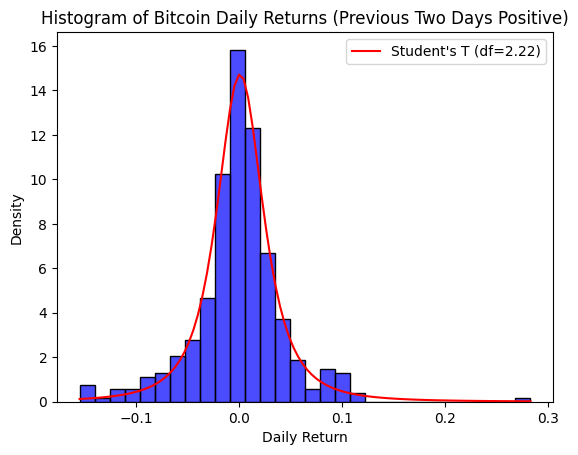

Kolmogorov-Smirnov Test: KS Statistic = 0.030924696299098775, p-value = 0.8620994914433979


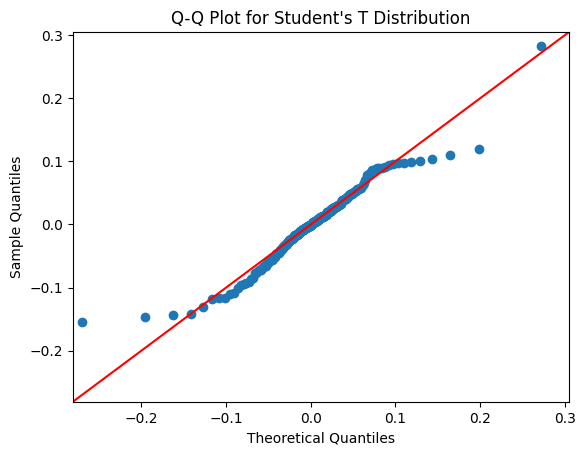

In [ ]:
filtered_data = filtered_data_negative['BTC_DAILY_RETURN']

params = t.fit(filtered_data)
df = params[0]  # degrees of freedom
loc = params[1]  # location parameter
scale = params[2]  # scale parameter

# Plot histogram of the filtered daily returns
sns.histplot(filtered_data, bins=30, kde=False, color='blue', edgecolor='black', alpha=0.7, stat="density")

# Plot the fitted T-distribution
x = np.linspace(filtered_data.min(), filtered_data.max(), 100)
p = t.pdf(x, df, loc, scale)
plt.plot(x, p, label=f'Student\'s T (df={df:.2f})', color='red')

plt.title('Histogram of Bitcoin Daily Returns (Previous Two Days Positive)')
plt.xlabel('Daily Return')
plt.ylabel('Density')
plt.legend()
plt.show()

# Kolmogorov-Smirnov Test
cdf = lambda x: t.cdf(x, df, loc, scale)
ks_stat, ks_p_value = kstest(filtered_data, cdf)

print(f"Kolmogorov-Smirnov Test: KS Statistic = {ks_stat}, p-value = {ks_p_value}")

# Q-Q Plot
sm.qqplot(filtered_data, t(df, loc, scale), line='45')
plt.title('Q-Q Plot for Student\'s T Distribution')
plt.show()

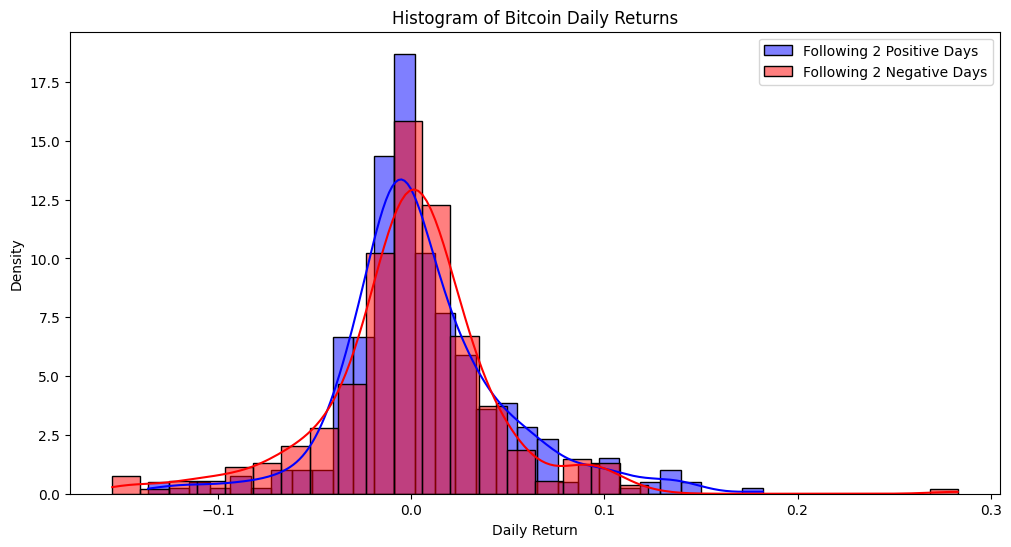

In [ ]:
# Plot histograms for both distributions
plt.figure(figsize=(12, 6))

# Plot histogram for returns following two positive days
sns.histplot(filtered_data_positive['BTC_DAILY_RETURN'], bins=30, kde=True, color='blue', label='Following 2 Positive Days', stat='density')

# Plot histogram for returns following two negative days
sns.histplot(filtered_data_negative['BTC_DAILY_RETURN'], bins=30, kde=True, color='red', label='Following 2 Negative Days', stat='density')

plt.title('Histogram of Bitcoin Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
plt.savefig('/content/btc_index_historical_retutrns_histograms.png')

files.download('/content/btc_index_historical_retutrns_histograms.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
data_pos = filtered_data_positive['BTC_DAILY_RETURN']
data_neg = filtered_data_negative['BTC_DAILY_RETURN']

# Kolmogorov-Smirnov Test
ks_stat, ks_p_value = ks_2samp(data_pos, data_neg)

print(f"KS Statistic: {ks_stat}")
print(f"KS P-Value: {ks_p_value}")

KS Statistic: 0.07336956521739131
KS P-Value: 0.2754099158031781


In [ ]:
u_stat, u_p_value = mannwhitneyu(data_pos, data_neg, alternative='two-sided')

print(f"Mann-Whitney U Statistic: {u_stat}")
print(f"Mann-Whitney U P-Value: {u_p_value}")

Mann-Whitney U Statistic: 69951.0
Mann-Whitney U P-Value: 0.43763879757714885


In [ ]:
print(data.head())

        Date  BTC_PRICE  fear_and_greed_index  S&P500_PRICE  BTC_MA_30  \
0 2018-02-01   10226.86                    30   2816.449951        NaN   
1 2018-02-02    9114.73                    15   2808.919922        NaN   
2 2018-02-05    8218.05                    11   2741.060059        NaN   
3 2018-02-06    6936.43                     8   2614.780029        NaN   
4 2018-02-07    7701.25                    36   2690.949951        NaN   

   SP500_MA_30  BTC_DAILY_RETURN  LAGGED_BTC_DAILY_RETURN  \
0          NaN               NaN                      NaN   
1          NaN         -0.108746                      NaN   
2          NaN         -0.098377                -0.108746   
3          NaN         -0.155952                -0.098377   
4          NaN          0.110261                -0.155952   

   LAGGED_BTC_DAILY_RETURN_2  
0                        NaN  
1                        NaN  
2                        NaN  
3                  -0.108746  
4                  -0.098377  


To analyze BTC price's relationship with the greed and fear index I can create classes of the greed and fear index (extreme fear, fear, neutral, greed, extreme greed) and then determine BTC's price action following those days.


In [ ]:
def classify_greed_fear(index):
    if index <= 20:
        return 'Extreme Fear'
    elif 21 <= index <= 40:
        return 'Fear'
    elif 41 <= index <= 60:
        return 'Neutral'
    elif 61 <= index <= 80:
        return 'Greedy'
    elif index > 80:
        return 'Extreme Greed'

# Apply the function to create a new qualitative column
data['fear_and_greed_index_qual'] = data['fear_and_greed_index'].apply(classify_greed_fear)

Fear - K-S test statistic: 0.02811038499326457, p-value: 0.8126690258514364
Extreme Fear - K-S test statistic: 0.05893512952152713, p-value: 0.46982005183600606
Neutral - K-S test statistic: 0.04170882008956678, p-value: 0.39902970677233607
Greedy - K-S test statistic: 0.02757253629257861, p-value: 0.9381979396667683
Extreme Greed - K-S test statistic: 0.037103940240566124, p-value: 0.9991206141834048


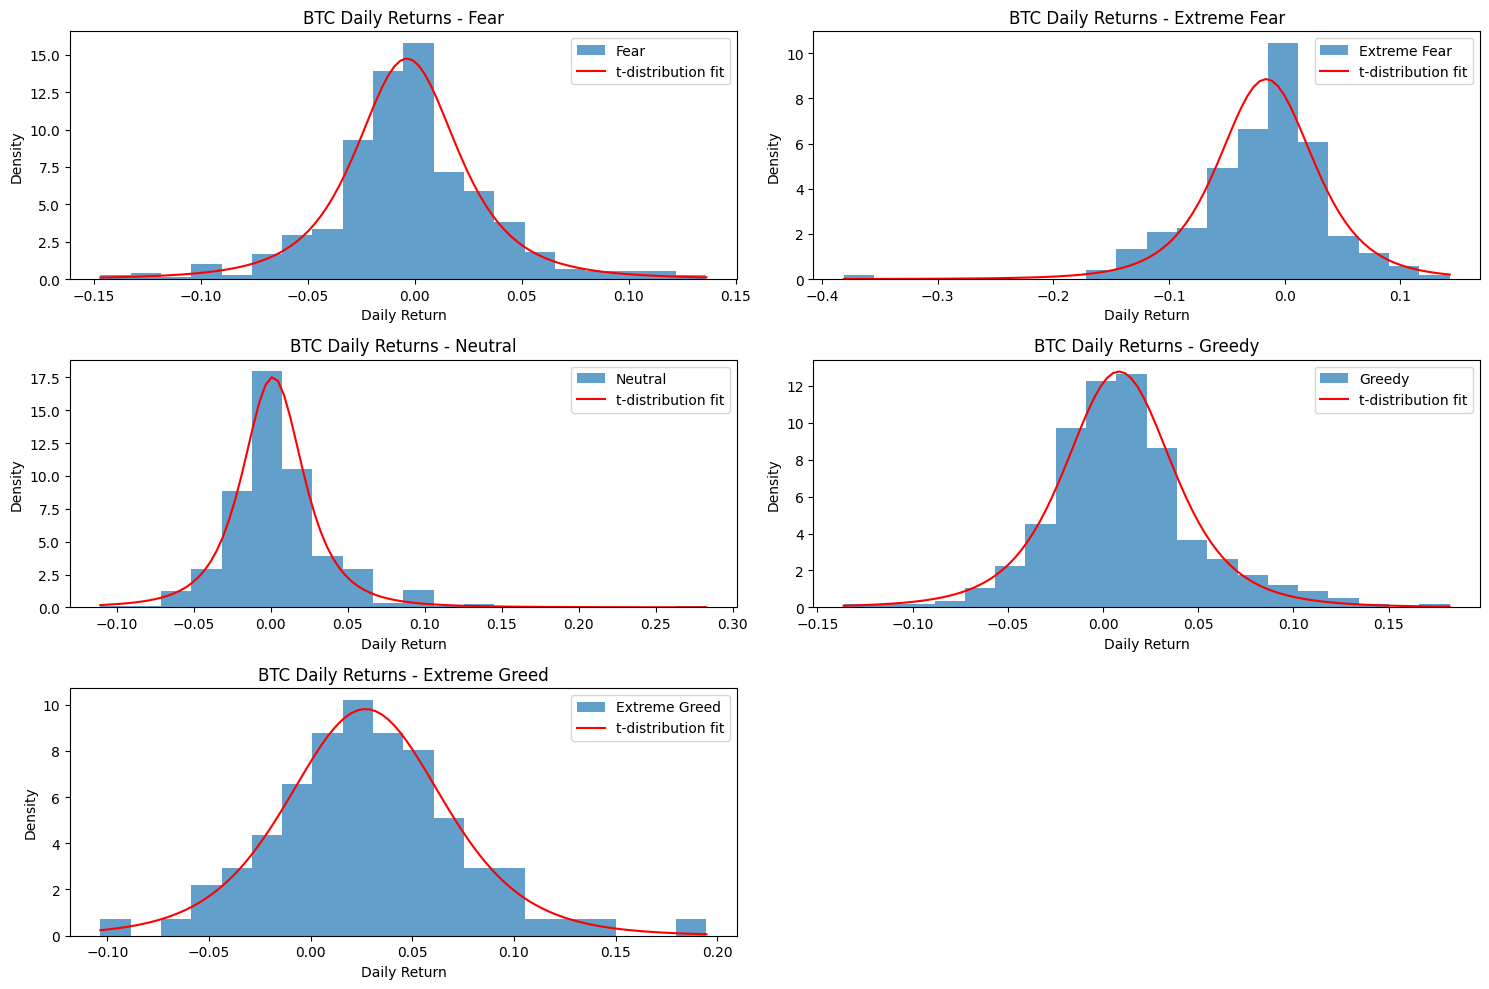

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Comparison between Fear and Extreme Fear - K-S test statistic: 0.22441683796585932, p-value: 8.007157549338291e-07
Comparison between Fear and Neutral - K-S test statistic: 0.12005128815217248, p-value: 0.0018716002306742611
Comparison between Fear and Greedy - K-S test statistic: 0.19702743273783013, p-value: 1.2339160005820252e-07
Comparison between Fear and Extreme Greed - K-S test statistic: 0.3836023604963985, p-value: 9.300392140926721e-11
Comparison between Extreme Fear and Neutral - K-S test statistic: 0.29201673750453033, p-value: 5.467767122666909e-11
Comparison between Extreme Fear and Greedy - K-S test statistic: 0.27794909748776775, p-value: 2.6017497234539584e-09
Comparison between Extreme Fear and Extreme Greed - K-S test statistic: 0.4227774172615185, p-value: 1.1306113235838687e-10
Comparison between Neutral and Greedy - K-S test statistic: 0.12944009632751355, p-value: 0.002063923078782493
Comparison between Neutral and Extreme Greed - K-S test statistic: 0.3706209809

<Figure size 640x480 with 0 Axes>

In [ ]:
categories = data['fear_and_greed_index_qual'].unique()

plt.figure(figsize=(15, 10))
for i, category in enumerate(categories):
    plt.subplot(3, 2, i+1)
    subset = data[data['fear_and_greed_index_qual'] == category]

    # Fit a t-distribution to the data
    params = t.fit(subset['BTC_DAILY_RETURN'].dropna())

    # Generate histogram
    plt.hist(subset['BTC_DAILY_RETURN'], bins=20, density=True, alpha=0.7, label=category)

    # Plot the fitted t-distribution
    x = np.linspace(subset['BTC_DAILY_RETURN'].min(), subset['BTC_DAILY_RETURN'].max(), 100)
    plt.plot(x, t.pdf(x, *params), 'r-', label='t-distribution fit')

    plt.title(f'BTC Daily Returns - {category}')
    plt.xlabel('Daily Return')
    plt.ylabel('Density')
    plt.legend()

    # Kolmogorov-Smirnov test for goodness-of-fit
    ks_stat, ks_p_value = kstest(subset['BTC_DAILY_RETURN'].dropna(), 't', args=params)
    print(f'{category} - K-S test statistic: {ks_stat}, p-value: {ks_p_value}')

plt.tight_layout()
plt.show()

# Compare distributions between different categories using two-sample K-S test
for i, cat1 in enumerate(categories):
    for j, cat2 in enumerate(categories):
        if i < j:
            subset1 = data[data['fear_and_greed_index_qual'] == cat1]['BTC_DAILY_RETURN'].dropna()
            subset2 = data[data['fear_and_greed_index_qual'] == cat2]['BTC_DAILY_RETURN'].dropna()

            if subset1.empty or subset2.empty:
              print(f'One of the subsets is empty for categories {cat1} and {cat2}')
              continue

            ks_stat, ks_p_value = ks_2samp(subset1, subset2)
            print(f'Comparison between {cat1} and {cat2} - K-S test statistic: {ks_stat}, p-value: {ks_p_value}')

The goodness-of-fit tests show that the BTC daily returns for each category fit well to a t-distribution. However, the comparisons between different categories reveal statistically significant differences in the distributions of BTC daily returns, suggesting that the market's sentiment, as captured by the Greed and Fear Index, has a meaningful impact on the behavior of BTC returns.

In [ ]:
# Calculate percentage change in S&P 500 Index and lag it by one day
data['S&P500_Change'] = data['S&P500_PRICE'].pct_change()
data['S&P500_Change_Lagged'] = data['S&P500_Change'].shift(1)

In [ ]:
correlation = data['BTC_DAILY_RETURN'].corr(data['S&P500_Change_Lagged'])
print(f'Correlation between BTC Daily Returns and S&P 500 Index Change: {correlation}')

Correlation between BTC Daily Returns and S&P 500 Index Change: 0.053099991739397445


In [ ]:
correlation = data['BTC_DAILY_RETURN'].corr(data['S&P500_Change'])
print(f'Correlation between BTC Daily Returns and S&P 500 Index: {correlation}')

Correlation between BTC Daily Returns and S&P 500 Index: 0.22096408297246573


In [ ]:
correlation = data['BTC_DAILY_RETURN'].corr(data['fear_and_greed_index'])
print(f'Correlation between BTC Daily Returns and Fear and Greed Index: {correlation}')

Correlation between BTC Daily Returns and Fear and Greed Index: 0.25743263523760096


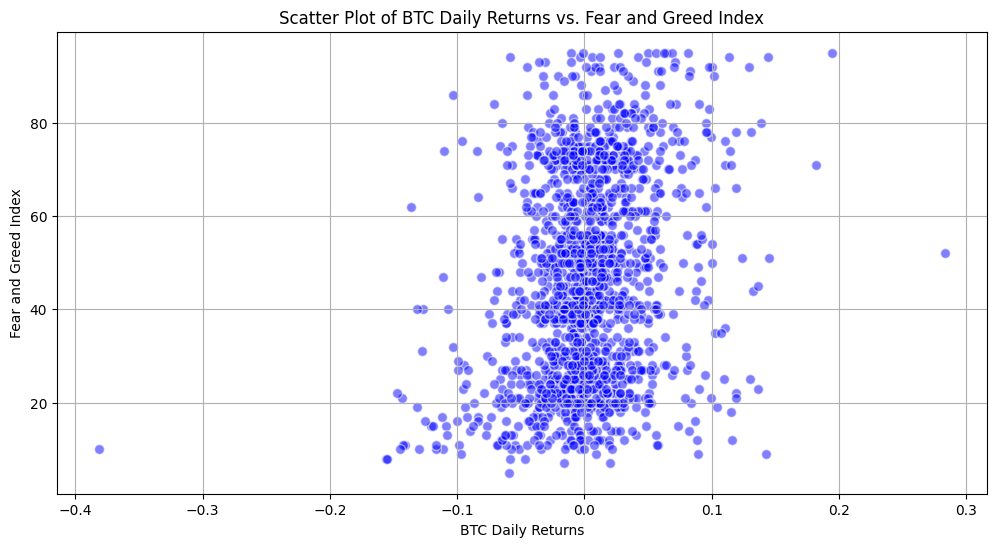

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(data['BTC_DAILY_RETURN'], data['fear_and_greed_index'], alpha=0.5, c='blue', edgecolors='w', s=50)
plt.title('Scatter Plot of BTC Daily Returns vs. Fear and Greed Index')
plt.xlabel('BTC Daily Returns')
plt.ylabel('Fear and Greed Index')
plt.grid(True)
plt.show()

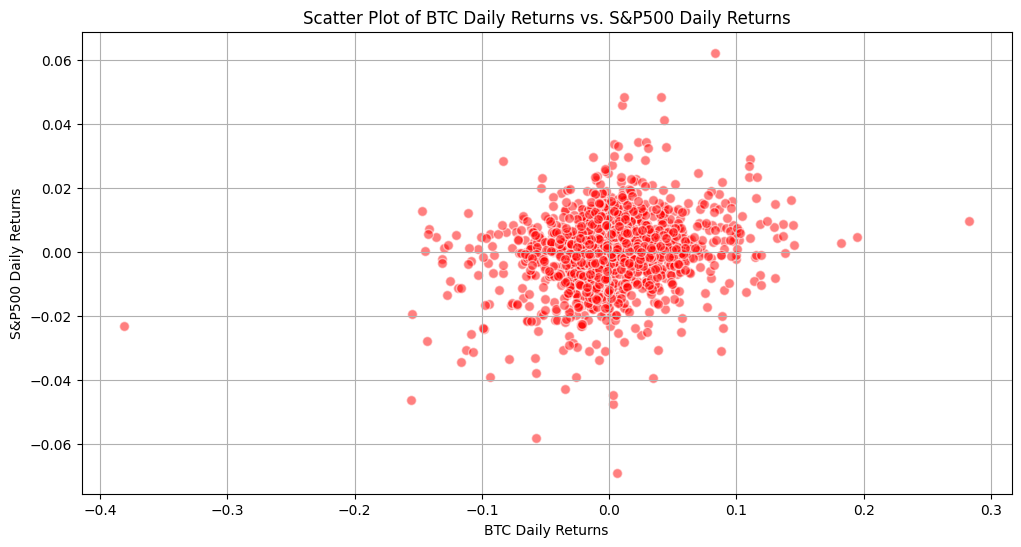

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(data['BTC_DAILY_RETURN'], data['S&P500_Change'], alpha=0.5, c='red', edgecolors='w', s=50)
plt.title('Scatter Plot of BTC Daily Returns vs. S&P500 Daily Returns')
plt.xlabel('BTC Daily Returns')
plt.ylabel('S&P500 Daily Returns')
plt.grid(True)
plt.show()

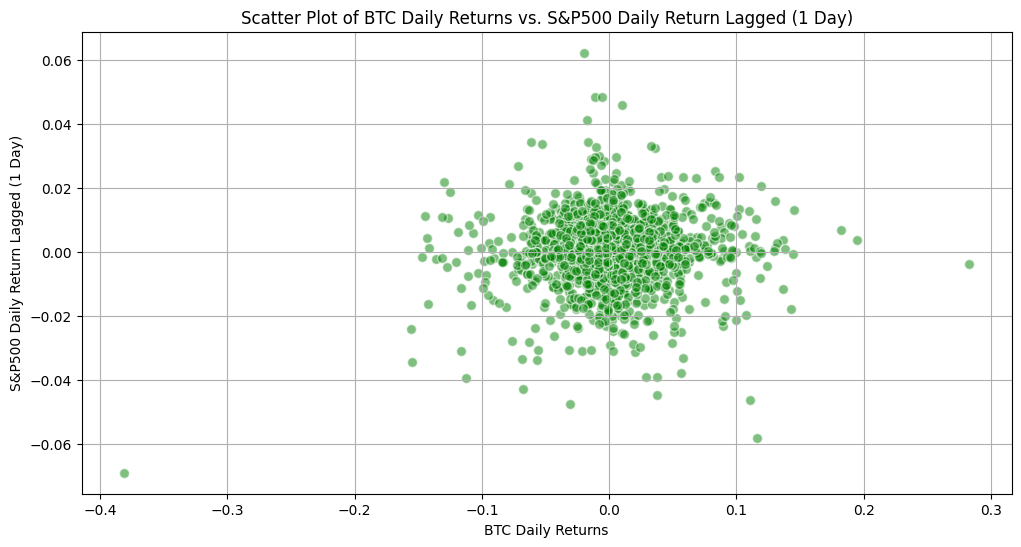

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(data['BTC_DAILY_RETURN'], data['S&P500_Change_Lagged'], alpha=0.5, c='green', edgecolors='w', s=50)
plt.title('Scatter Plot of BTC Daily Returns vs. S&P500 Daily Return Lagged (1 Day)')
plt.xlabel('BTC Daily Returns')
plt.ylabel('S&P500 Daily Return Lagged (1 Day)')
plt.grid(True)
plt.show()

In [ ]:
data['fear_and_greed_index_lagged'] = data['fear_and_greed_index'].shift(1)

In [ ]:
correlation = data['BTC_DAILY_RETURN'].corr(data['fear_and_greed_index_lagged'])
print(f'Correlation between BTC Daily Returns and Fear and Greed Index: {correlation}')

Correlation between BTC Daily Returns and Fear and Greed Index: 0.05877902704363608


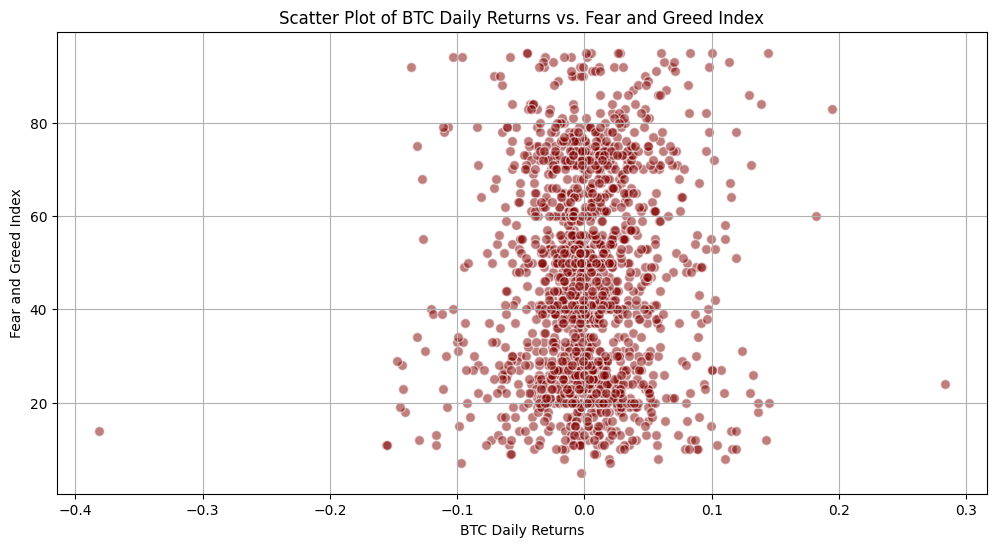

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(data['BTC_DAILY_RETURN'], data['fear_and_greed_index_lagged'], alpha=0.5, c='maroon', edgecolors='w', s=50)
plt.title('Scatter Plot of BTC Daily Returns vs. Fear and Greed Index')
plt.xlabel('BTC Daily Returns')
plt.ylabel('Fear and Greed Index')
plt.grid(True)
plt.show()

In [ ]:
# Extract features and targets
data_for_linear_regression = data[['fear_and_greed_index_lagged', 'BTC_DAILY_RETURN']].dropna()

X = data_for_linear_regression[['fear_and_greed_index_lagged']].values
y = data_for_linear_regression['BTC_DAILY_RETURN'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [ ]:
import torch.nn as nn

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

# Initialize the model
model = LinearRegressionModel()

In [ ]:
import torch.optim as optim

# Define loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent

# Training loop
num_epochs = 1000

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs.squeeze(), y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: 1.0093
Epoch [200/1000], Loss: 0.9970
Epoch [300/1000], Loss: 0.9967
Epoch [400/1000], Loss: 0.9967
Epoch [500/1000], Loss: 0.9967
Epoch [600/1000], Loss: 0.9967
Epoch [700/1000], Loss: 0.9967
Epoch [800/1000], Loss: 0.9967
Epoch [900/1000], Loss: 0.9967
Epoch [1000/1000], Loss: 0.9967


Test Loss: 0.6944


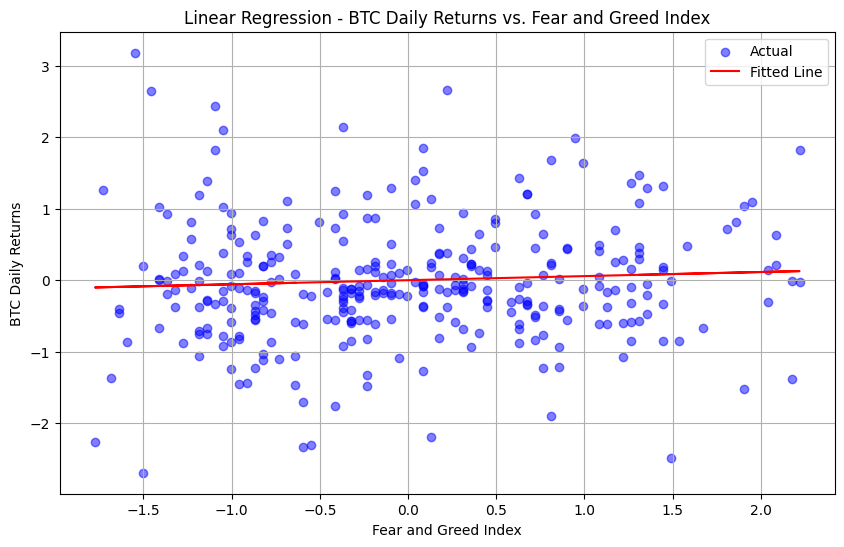

In [ ]:
# Evaluate the model
with torch.no_grad():
    model.eval()
    predictions = model(X_test_tensor).squeeze()
    test_loss = criterion(predictions, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

    # Optionally, you can visualize the results
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    plt.scatter(X_test_tensor.numpy(), y_test_tensor.numpy(), label='Actual', color='blue', alpha=0.5)
    plt.plot(X_test_tensor.numpy(), predictions.numpy(), label='Fitted Line', color='red')
    plt.title('Linear Regression - BTC Daily Returns vs. Fear and Greed Index')
    plt.xlabel('Fear and Greed Index')
    plt.ylabel('BTC Daily Returns')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
data_for_linear_regression_2 = data[['fear_and_greed_index_lagged', 'S&P500_Change_Lagged', 'BTC_DAILY_RETURN']].dropna()

# Extract features and targets
X = data_for_linear_regression_2[['fear_and_greed_index_lagged', 'S&P500_Change_Lagged']].values
y = data_for_linear_regression_2['BTC_DAILY_RETURN'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [ ]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(2, 1)  # 2 features

    def forward(self, x):
        return self.linear(x)

# Initialize the model
model = LinearRegressionModel()

In [ ]:
# Define optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.01)  # You can adjust the learning rate
criterion = nn.MSELoss()  # Mean Squared Error Loss

# Training loop
num_epochs = 1000

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs.squeeze(), y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.9944
Epoch [200/1000], Loss: 0.9943
Epoch [300/1000], Loss: 0.9943
Epoch [400/1000], Loss: 0.9943
Epoch [500/1000], Loss: 0.9943
Epoch [600/1000], Loss: 0.9943
Epoch [700/1000], Loss: 0.9943
Epoch [800/1000], Loss: 0.9943
Epoch [900/1000], Loss: 0.9943
Epoch [1000/1000], Loss: 0.9943


Test Loss: 1.2102


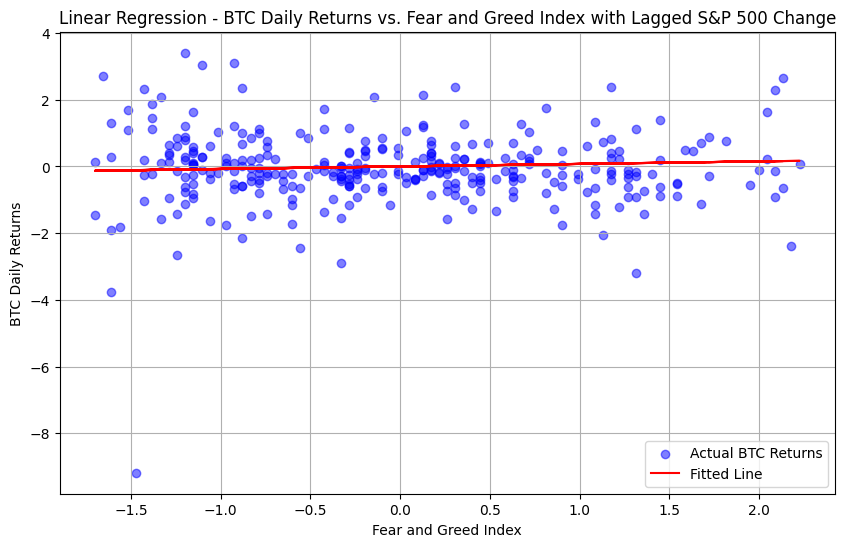

In [ ]:
with torch.no_grad():
    model.eval()
    predictions = model(X_test_tensor).squeeze()
    test_loss = criterion(predictions, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

    # Optionally, visualize the results
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    plt.scatter(X_test_tensor.numpy()[:, 0], y_test_tensor.numpy(), label='Actual BTC Returns', color='blue', alpha=0.5)
    plt.plot(X_test_tensor.numpy()[:, 0], predictions.numpy(), label='Fitted Line', color='red')
    plt.title('Linear Regression - BTC Daily Returns vs. Fear and Greed Index with Lagged S&P 500 Change')
    plt.xlabel('Fear and Greed Index')
    plt.ylabel('BTC Daily Returns')
    plt.legend()
    plt.grid(True)
    plt.show()

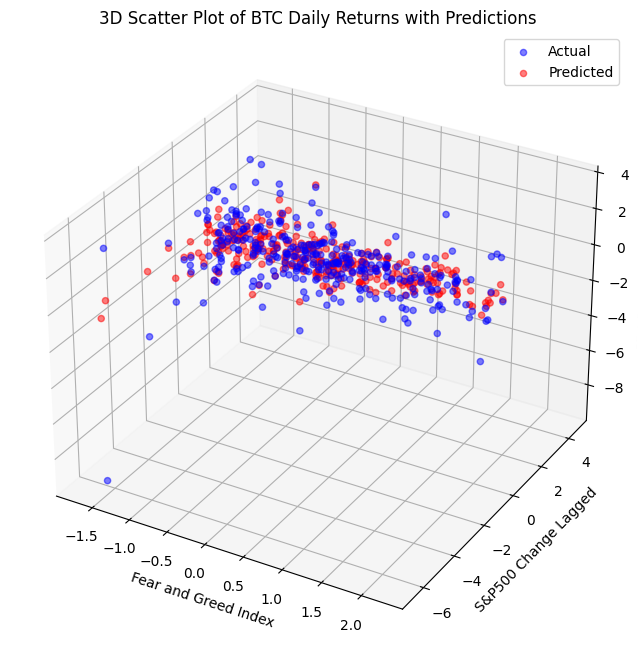

In [ ]:
X_test_np = X_test_tensor.numpy()
y_test_np = y_test_tensor.numpy()
predictions_np = predictions.numpy()

# Create 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual values
sc = ax.scatter(X_test_np[:, 0], X_test_np[:, 1], y_test_np, c='blue', label='Actual', alpha=0.5)

# Scatter plot of predicted values
ax.scatter(X_test_np[:, 0], X_test_np[:, 1], predictions_np, c='red', label='Predicted', alpha=0.5)

# Labels and title
ax.set_xlabel('Fear and Greed Index')
ax.set_ylabel('S&P500 Change Lagged')
ax.set_zlabel('BTC Daily Returns')
ax.set_title('3D Scatter Plot of BTC Daily Returns with Predictions')
ax.legend()

plt.show()

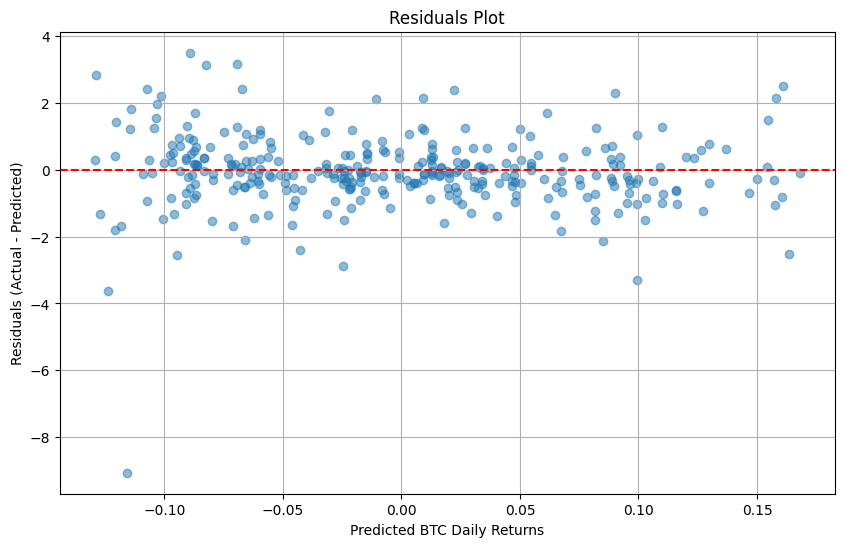

In [ ]:
# Compute residuals
residuals = y_test_tensor - predictions

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(predictions.numpy(), residuals.numpy(), alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted BTC Daily Returns')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()

In [ ]:
print(data.head())

        Date  BTC_PRICE  fear_and_greed_index  S&P500_PRICE  BTC_MA_30  \
0 2018-02-01   10226.86                    30   2816.449951        NaN   
1 2018-02-02    9114.73                    15   2808.919922        NaN   
2 2018-02-05    8218.05                    11   2741.060059        NaN   
3 2018-02-06    6936.43                     8   2614.780029        NaN   
4 2018-02-07    7701.25                    36   2690.949951        NaN   

   SP500_MA_30  BTC_DAILY_RETURN  LAGGED_BTC_DAILY_RETURN  \
0          NaN               NaN                      NaN   
1          NaN         -0.108746                      NaN   
2          NaN         -0.098377                -0.108746   
3          NaN         -0.155952                -0.098377   
4          NaN          0.110261                -0.155952   

   LAGGED_BTC_DAILY_RETURN_2 fear_and_greed_index_qual  S&P500_Change  \
0                        NaN                      Fear            NaN   
1                        NaN              

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

time_series_data = data

# Set 'Date' as index
time_series_data.set_index('Date', inplace=True)

# Drop rows with missing values in relevant columns
time_series_data.dropna(subset=['BTC_PRICE', 'fear_and_greed_index', 'S&P500_PRICE'], inplace=True)

In [ ]:
# Select relevant columns for the VAR model
time_series_data = time_series_data[['BTC_PRICE', 'fear_and_greed_index', 'S&P500_PRICE']]

In [ ]:
# Define the model
model = VAR(time_series_data)

# Fit the model
results = model.fit(maxlags=15, ic='aic')  # Use AIC to determine lag length

# Print model summary
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 28, Jul, 2024
Time:                     01:16:21
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    25.0384
Nobs:                     1609.00    HQIC:                   24.9942
Log likelihood:          -26915.1    FPE:                6.97484e+10
AIC:                      24.9682    Det(Omega_mle):     6.88459e+10
--------------------------------------------------------------------
Results for equation BTC_PRICE
                             coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------
const                        -660.735664       269.985289           -2.447           0.014
L1.BTC_PRICE                    0.925452         0.030661           30.183           0.000
L1.fear_and_gree

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Forecast the next 10 time steps
forecast_steps = 10
forecast = results.forecast(time_series_data.values[-results.k_ar:], steps=forecast_steps)

# Convert forecast to DataFrame
forecast_df = pd.DataFrame(forecast, columns=time_series_data.columns, index=pd.date_range(start=time_series_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D'))

# Print forecast
print(forecast_df)

               BTC_PRICE  fear_and_greed_index  S&P500_PRICE
2024-06-29  61574.397850             46.532648   5489.262845
2024-06-30  61574.596455             47.024466   5489.039921
2024-07-01  61567.724538             47.320992   5488.892999
2024-07-02  61563.587899             47.638108   5488.758548
2024-07-03  61560.660882             47.936780   5488.655519
2024-07-04  61559.140019             48.224953   5488.579352
2024-07-05  61558.916034             48.501643   5488.529778
2024-07-06  61559.938970             48.767548   5488.505729
2024-07-07  61562.150454             49.023022   5488.506330
2024-07-08  61565.496399             49.268470   5488.530707


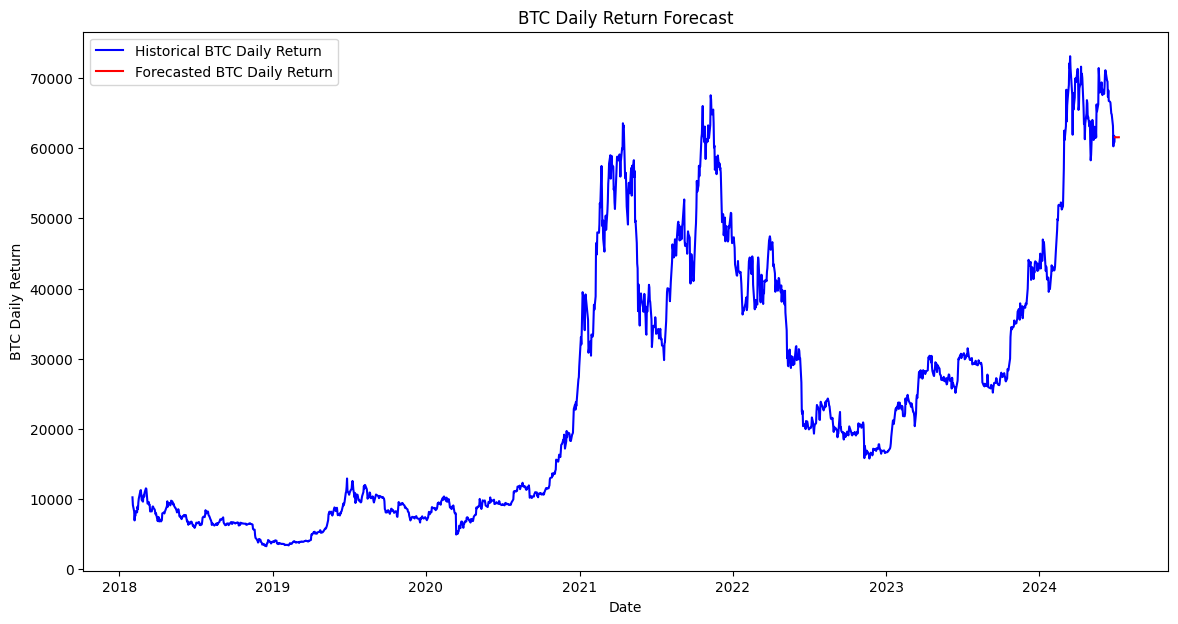

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(time_series_data.index, time_series_data['BTC_PRICE'], label='Historical BTC Daily Return', color='blue')

# Plot forecasted BTC Daily Return
plt.plot(forecast_df.index, forecast_df['BTC_PRICE'], label='Forecasted BTC Daily Return', color='red')

plt.xlabel('Date')
plt.ylabel('BTC Daily Return')
plt.title('BTC Daily Return Forecast')
plt.legend()
plt.show()

In [ ]:
combined_df = pd.concat([
    time_series_data[['BTC_PRICE']].rename(columns={'BTC_PRICE': 'Actual'}),
    forecast_df[['BTC_PRICE']].rename(columns={'BTC_PRICE': 'Forecast'})
])

# Drop rows with NaN values if any
#combined_df.dropna(inplace=True)

In [ ]:
print(combined_df.head())

              Actual  Forecast
2018-02-01  10226.86       NaN
2018-02-02   9114.73       NaN
2018-02-05   8218.05       NaN
2018-02-06   6936.43       NaN
2018-02-07   7701.25       NaN
